# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
import pandas as pd

# number of training images
n_train = X_train.shape[0]

# number of validation images
n_validation = X_valid.shape[0]

# number of testing iamges
n_test = X_test.shape[0]

# shape of an traffic sign image
image_shape = [X_train.shape[1], X_train.shape[2], X_train.shape[3] ]

# number of unique classes/labels in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
signnamesDF = pd.read_csv('./signnames.csv')
signnamesDF.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [4]:
signnamesDF[signnamesDF['ClassId'] == y_train[10000]]['SignName'][y_train[10000]]

'Speed limit (20km/h)'

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style("whitegrid")

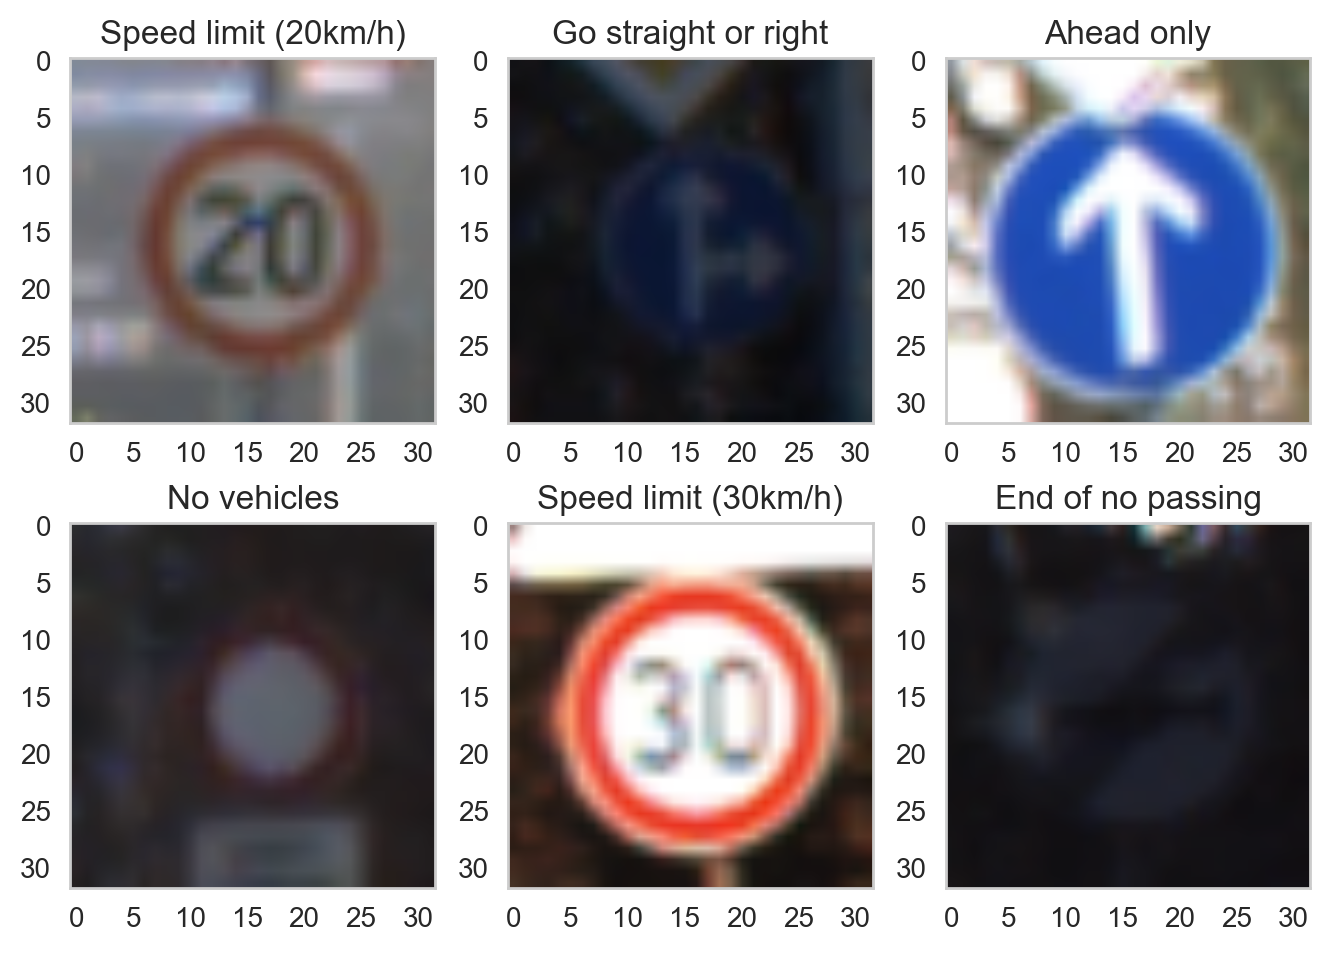

In [8]:
# let's have a look at a few different image to see what they're like
ax = plt.subplot(2,3,1)
ax.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[10000]]['SignName'][y_train[10000]])
ax.grid(False)
ax.imshow(X_train[10000])
ax2 = plt.subplot(2,3,2)
ax2.grid(False)
ax2.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[1000]]['SignName'][y_train[1000]])
ax2.imshow(X_train[1000])
ax3 = plt.subplot(2,3,3)
ax3.grid(False)
ax3.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[20000]]['SignName'][y_train[20000]])
ax3.imshow(X_train[20000])

ax4 = plt.subplot(2,3,4)
ax4.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[30000]]['SignName'][y_train[30000]])
ax4.grid(False)
ax4.imshow(X_train[30000])
ax5 = plt.subplot(2,3,5)
ax5.grid(False)
ax5.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[3000]]['SignName'][y_train[3000]])
ax5.imshow(X_train[3000])
ax6 = plt.subplot(2,3,6)
ax6.grid(False)
ax6.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[200]]['SignName'][y_train[200]])
ax6.imshow(X_train[200])

plt.savefig('examples/train_examples.jpg')

quick observation-- some normalisation of the intensities is really needed here, since some images are light
and some dark. Will be implementing this as part of the preprocssing pipeline

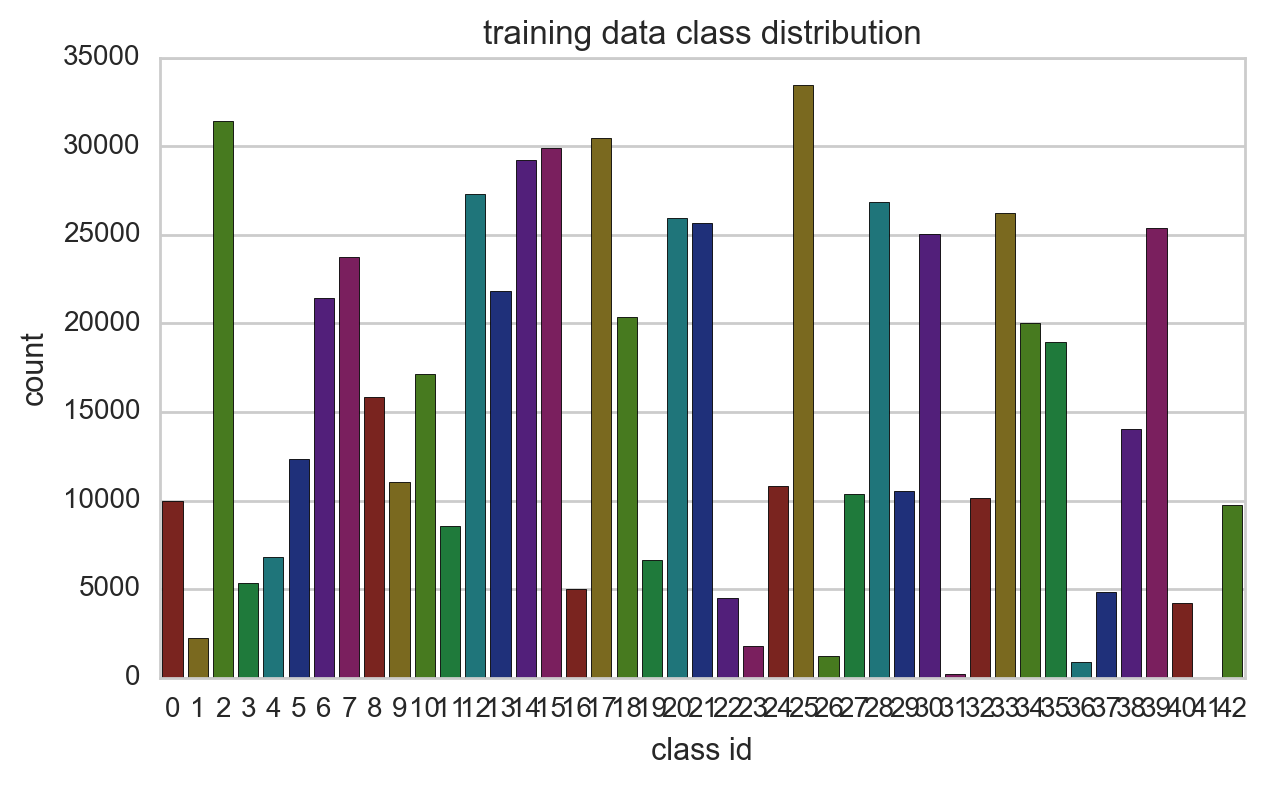

In [86]:
# it would be useful to see if there are any imbalances in the classes, as these can 
# affect accuracy of the training, especially if the validation/test distributions are quite different
train_class_id, train_class_count = np.unique(y_train, return_index=True)
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
ax = sns.barplot(train_class_id, train_class_count, palette=sns.hls_palette(8, l=.3, s=.8))
ax.set(xlabel='class id', ylabel='count', title="training data class distribution")
plt.savefig('examples/train_distribution.jpg')

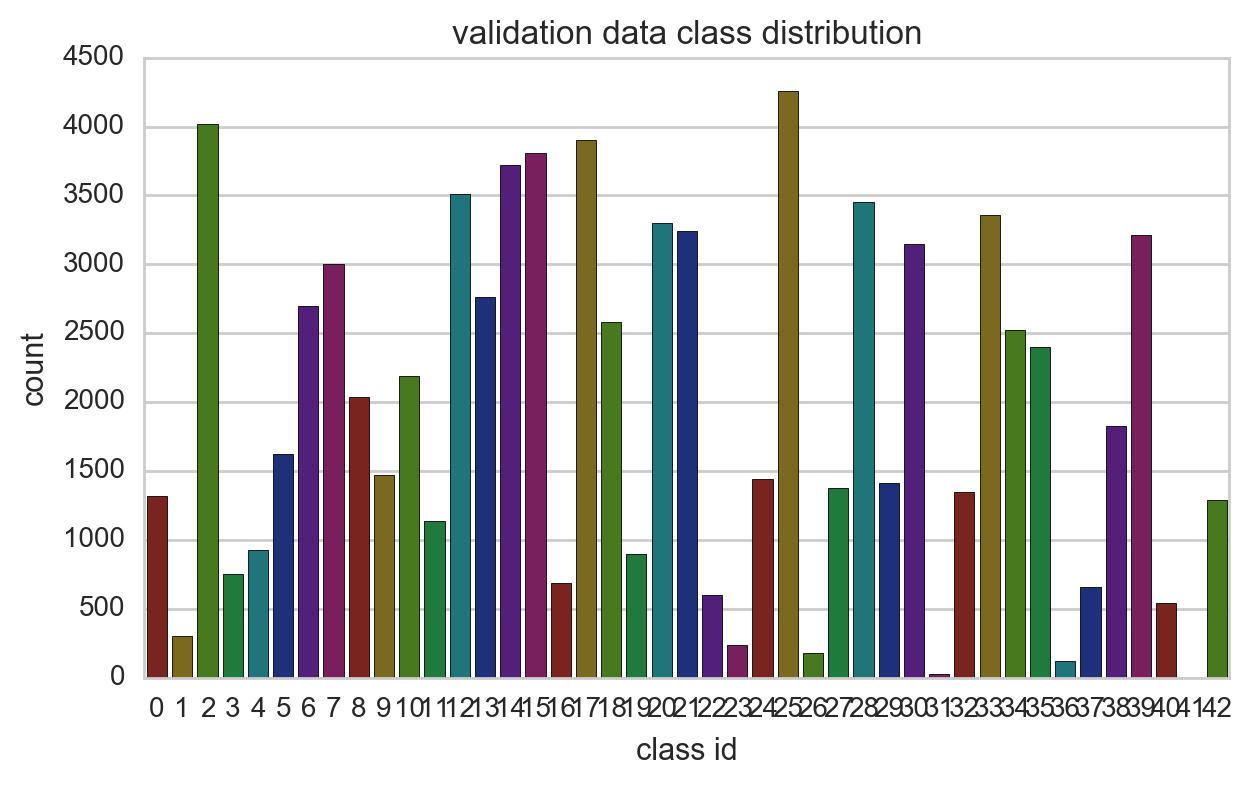

In [87]:
valid_class_id, valid_class_count = np.unique(y_valid, return_index=True)
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
ax = sns.barplot(valid_class_id, valid_class_count, palette=sns.hls_palette(8, l=.3, s=.8))
ax.set(xlabel='class id', ylabel='count', title="validation data class distribution")
plt.savefig('examples/validation_distribution.jpg')

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


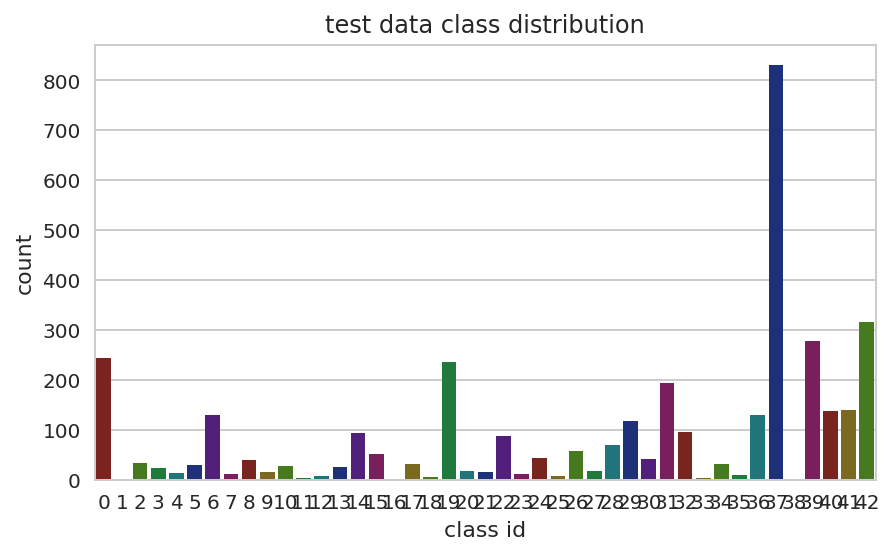

In [7]:
test_class_id, test_class_count = np.unique(y_test, return_index=True)
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
ax = sns.barplot(test_class_id, test_class_count, palette=sns.hls_palette(8, l=.3, s=.8))
ax.set(xlabel='class id', ylabel='count', title="test data class distribution")

Not completely rigorous but from the above 2 plots, it seems like the validation and train sets have a fairly similar distribution. However, the classes are not very balanced so it might be worth doing some sort of weighting in calculating the loss function (e.g. by using the class_weight param in keras) or using image augmentation to generate 'fake' images

The test data has a different distribution to the train/validation data. However, if the model is well generatlised this shouldn't be an issue

In [5]:
#computing the class distribution for model training
from sklearn.utils import class_weight
class_weight_arr = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight_dict = {}
for i, val in enumerate(class_weight_arr) :
    class_weight_dict[i] = val
    
print(class_weight_dict)

{0: 4.4959948320413439, 1: 0.40872680291284941, 2: 0.40262640286937407, 3: 0.64228497600590628, 4: 0.45721981342793327, 5: 0.49047216349541933, 6: 2.2479974160206719, 7: 0.62734811609879215, 8: 0.64228497600590628, 9: 0.61309020436927408, 10: 0.44959948320413434, 11: 0.69169151262174522, 12: 0.42818998400393748, 13: 0.42149951550387599, 14: 1.1728682170542635, 15: 1.4986649440137811, 16: 2.2479974160206719, 17: 0.81745360582569881, 18: 0.74933247200689057, 19: 4.4959948320413439, 20: 2.6975968992248061, 21: 2.9973298880275623, 22: 2.4523608174770963, 23: 1.7983979328165374, 24: 3.3719961240310079, 25: 0.59946597760551246, 26: 1.4986649440137811, 27: 3.8537098560354375, 28: 1.685998062015504, 29: 3.3719961240310079, 30: 2.0750745378652353, 31: 1.1728682170542635, 32: 3.8537098560354375, 33: 1.3510501999456459, 34: 2.2479974160206719, 35: 0.74933247200689057, 36: 2.4523608174770963, 37: 4.4959948320413439, 38: 0.43509627406851714, 39: 2.9973298880275623, 40: 2.6975968992248061, 41: 3.853

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


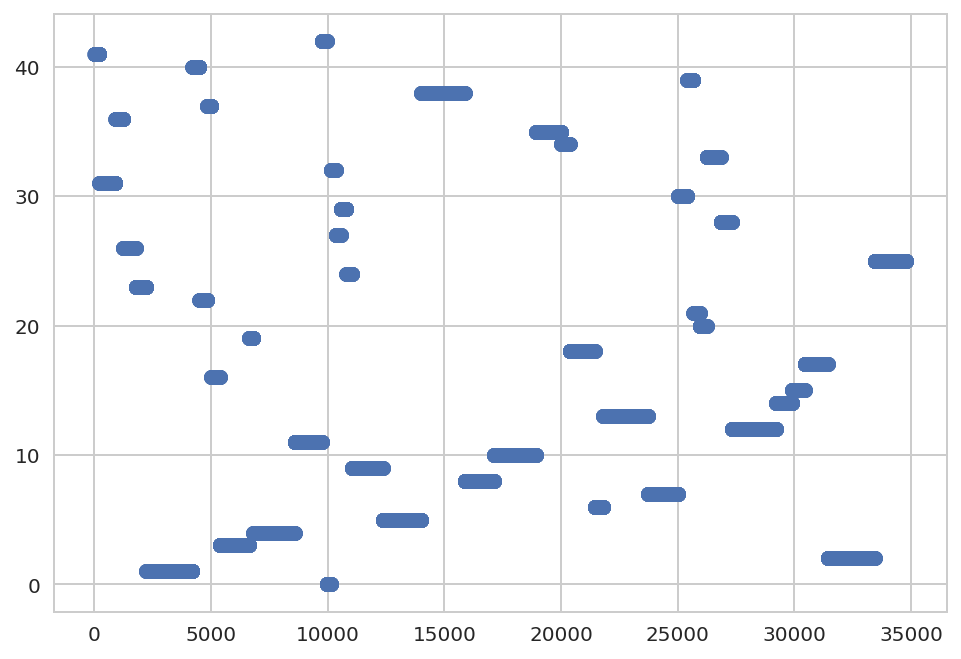

In [9]:
#to see how well the training samples are randomised-- they're not... however, by setting shuffle=True in keras training
#can resolve this issue
plt.scatter(range(len(y_train)), y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras import utils
from keras.callbacks import Callback, LambdaCallback, EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta, Adam
from keras import backend as K
# from keras.losses import categorical_crossentropy
# from keras.optimizers import Adam

Using TensorFlow backend.


In [12]:
from keras.preprocessing import image
datagen = image.ImageDataGenerator(
   # featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=30.0,width_shift_range=0.2,
    height_shift_range=0.2)

In [16]:
# would converting to grayscale help with classification? One might argue yes, that the 
# shape of the siymbols are the important part, but it's also true that the colors of traffic signs might also matter
# l;et's see
import cv2
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def grayscale_batch(imgs_arr):
    arr = np.zeros((imgs_arr.shape[0], imgs_arr.shape[1],imgs_arr.shape[2]))
    print(imgs_arr.shape, len(imgs_arr), arr.shape)
    for i in range(len(imgs_arr)):
        arr[i] = grayscale(imgs_arr[i])
    return arr

In [12]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    max_x = np.max(x)
    min_x = np.min(x)
    g = np.vectorize(lambda x: (x- min_x)/ (max_x - min_x))
    
    normalised = g(x)
    return normalised

In [42]:
X_train_norm = (X_train - 128)/128
X_valid_norm = (X_valid - 128)/128
X_test_norm = (X_test - 128)/128

In [13]:
X_train_norm2 = normalize(X_train)
X_valid_norm2 = normalize(X_valid)
X_test_norm2 = normalize(X_test)

In [18]:
X_train_gray = grayscale_batch(X_train)
X_valid_gray = grayscale_batch(X_valid)
X_test_gray = grayscale_batch(X_test)

X_train_g_norm = (X_train_gray - 128)/128
X_valid_g_norm = (X_valid_gray - 128)/128
X_test_g_norm = (X_test_gray - 128)/128


(34799, 32, 32, 3) 34799 (34799, 32, 32)
(4410, 32, 32, 3) 4410 (4410, 32, 32)
(12630, 32, 32, 3) 12630 (12630, 32, 32)


In [22]:
X_train_g_norm =X_train_g_norm.reshape(X_train_g_norm.shape + (1,))
X_valid_g_norm =X_valid_g_norm.reshape(X_valid_g_norm.shape + (1,))
X_test_g_norm = X_test_g_norm.reshape(X_test_g_norm.shape + (1,))

In [24]:
X_train_g_norm.shape

(34799, 32, 32, 1)

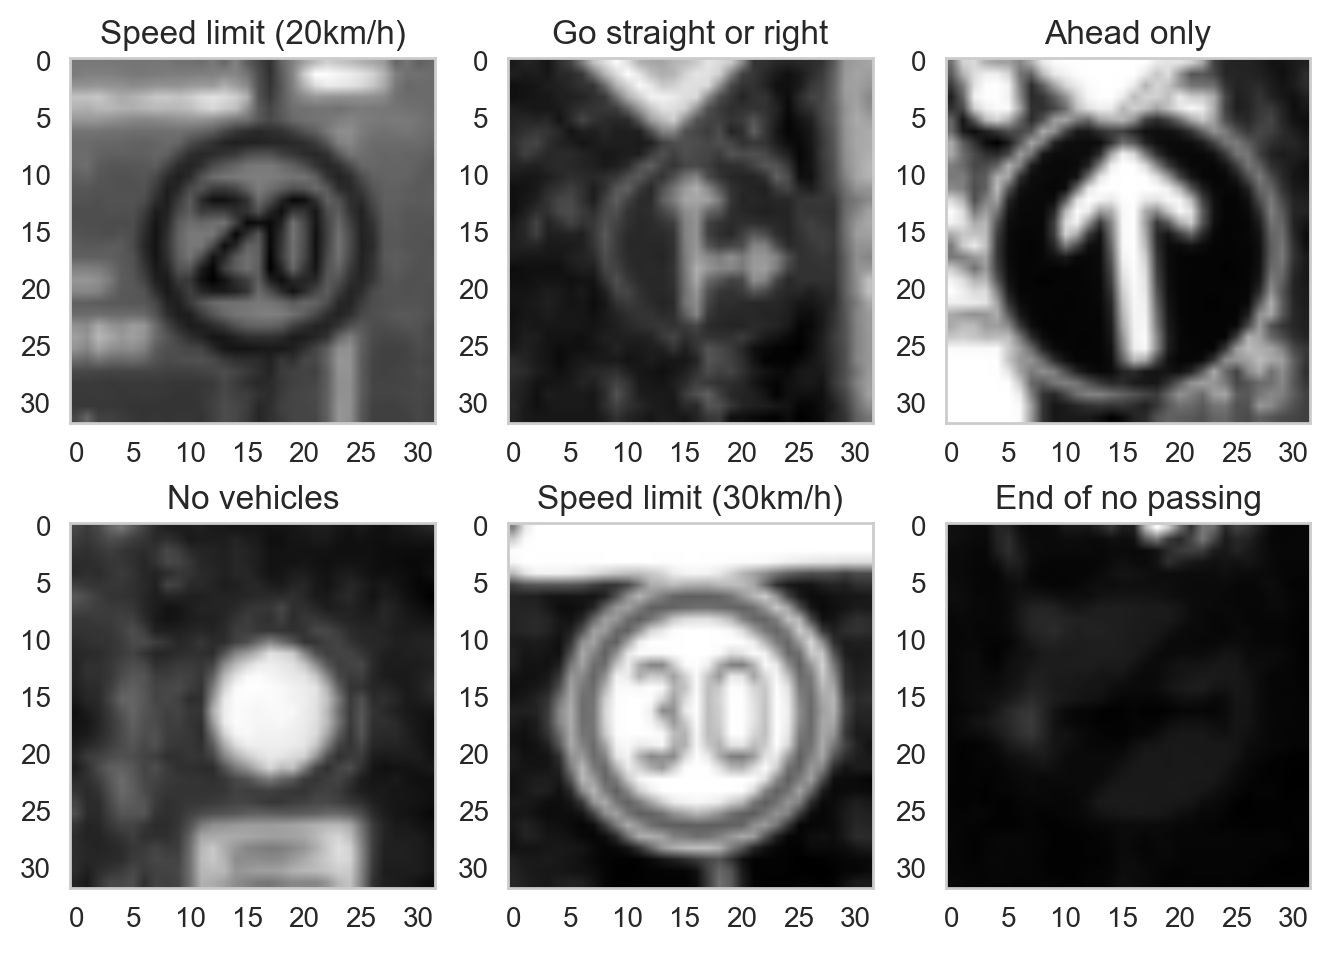

In [84]:
# let's have a look at a few different image to see what they're like
ax = plt.subplot(2,3,1)
ax.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[10000]]['SignName'][y_train[10000]])
ax.grid(False)
ax.imshow(X_train_gray[10000], cmap='gray')
ax2 = plt.subplot(2,3,2)
ax2.grid(False)
ax2.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[1000]]['SignName'][y_train[1000]])
ax2.imshow(X_train_gray[1000], cmap='gray')
ax3 = plt.subplot(2,3,3)
ax3.grid(False)
ax3.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[20000]]['SignName'][y_train[20000]])
ax3.imshow(X_train_gray[20000], cmap='gray')

ax4 = plt.subplot(2,3,4)
ax4.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[30000]]['SignName'][y_train[30000]])
ax4.grid(False)
ax4.imshow(X_train_gray[30000], cmap='gray')
ax5 = plt.subplot(2,3,5)
ax5.grid(False)
ax5.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[3000]]['SignName'][y_train[3000]])
ax5.imshow(X_train_gray[3000], cmap='gray')
ax6 = plt.subplot(2,3,6)
ax6.grid(False)
ax6.set_title(signnamesDF[signnamesDF['ClassId'] == y_train[200]]['SignName'][y_train[200]])
ax6.imshow(X_train_gray[200], cmap='gray')

plt.savefig('examples/train_examples_gray.jpg')

In [85]:
X_train_gray_normed = normalize(X_train_gray)
X_valid_gray_normed = normalize(X_valid_gray)
X_test_gray_normed = normalize(X_test_gray)

In [14]:
np.save('data/X_train_normed.npy', X_train_norm2)
np.save('data/X_valid_normed.npy', X_valid_norm2)

In [15]:
np.save('data/X_test_normed.npy', X_test_norm2)

In [25]:
np.save('data/X_train_gray.npy', X_train_g_norm)
np.save('data/X_valid_gray.npy', X_valid_g_norm)

In [5]:
X_train_norm2 = np.load('data/X_train_normed.npy')
X_valid_norm2 = np.load('data/X_valid_normed.npy')
X_test_norm2 = np.load('data/X_test_normed.npy')

In [6]:
y_train_cat = utils.to_categorical(y_train, n_classes)
y_valid_cat = utils.to_categorical(y_valid, n_classes)

In [7]:
y_test_cat = utils.to_categorical(y_test, n_classes)

In [10]:
X_valid_norm2.shape

(4410, 32, 32, 3)

### Model Architecture

In [15]:
# first, a quick implementation of a simple leNet to act as benchmark
# making use of the Xavier weight activation
def leNet():
    input_shape = image_shape
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape) )
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape) )
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])
    return model


In [13]:
#in this run, not using the class weighting
batch_size = 32
epochs = 40
leNet_model = leNet()
leNet_model.fit(X_train_norm, y_train_cat, batch_size=batch_size,
              epochs=epochs, verbose=0,shuffle=True, validation_data=(X_valid_norm, y_valid_cat))

In [14]:
#score[0] == loss, score[1] == accuracy
score = leNet_model.evaluate(X_valid_norm, y_valid_cat, verbose=0)
print(score)

[0.92650105693020157, 0.85419501171631063]


In [ ]:
leNet_model.save('models/lenet.h5')

In [69]:
# only logs every 10 epcoh
def logger(epoch, logs):
    if epoch %10== 0: 
        print(epoch, logs['loss'], logs['acc'], logs['val_acc'])
logging_callback = LambdaCallback(
    on_epoch_end=logger)


K.clear_session()
batch_size = 32
epochs = 50
leNet_model_weighted = leNet()
leNetWeightedHistory = leNet_model_weighted.fit(X_train_norm2, y_train_cat, batch_size=batch_size,
              epochs=epochs, verbose=0,shuffle=True, validation_data=(X_valid_norm2, y_valid_cat), 
                class_weight=class_weight_dict, callbacks=[logging_callback])

0 2.67188341518 0.242363286307 0.475283446793
10 0.109499424803 0.961406936981 0.922902494547
20 0.0413233256887 0.986580074167 0.93877551042
30 0.0220684893788 0.992815885514 0.944217687075
40 0.0130631612154 0.994741228196 0.938321995465


In [70]:
leNet_model_weighted.save('models/lenet_weighted.h5')

In [74]:
lenet_val_loss = leNetWeightedHistory.history.get('val_loss')
lenet_val_acc = leNetWeightedHistory.history.get('val_acc')
lenet_loss = leNetWeightedHistory.history.get('loss')
lenet_acc = leNetWeightedHistory.history.get('acc')

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


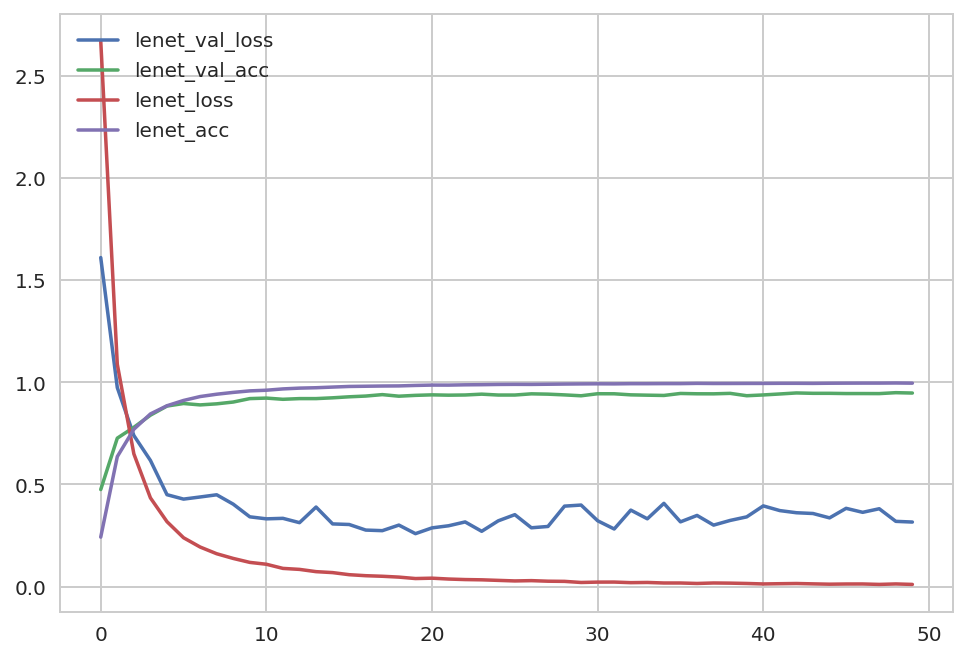

In [79]:
plt.plot(lenet_val_loss)
plt.plot(lenet_val_acc)
plt.plot(lenet_loss)
plt.plot(lenet_acc)
plt.legend(['lenet_val_loss', 'lenet_val_acc', 'lenet_loss', 'lenet_acc'], loc='upper left')
plt.show()

Just by taking into account the class imbalace, and using a better normalisation, takes the accuracy of the lenet architecture to accuracy > 93%. But can we do better than this, e.g. use a deeper network?

In [17]:
def getAugmentedImages(img):
    augmented = []
    i = 0
    for batch in datagen.flow(X_train[0:10],y_train[0:10], batch_size=1):
        augmented.append(batch)
        i += 1
        if i > 10:
            break 
            
        # otherwise the generator would loop indefinitely
# batch_size = 32
# epochs = 60
# datagen.fit(X_train)
# leNet_model.fit_generator(datagen.flow(X_train, y_train_cat, batch_size=batch_size),
#                     steps_per_epoch=len(X_train) / 32, epochs=epochs, verbose=0,
#           validation_data=(X_valid, y_valid_cat), class_weight=class_weight)


In [80]:
def model2(): #taking my inspiration from vgg, a deeper network
    input_shape = image_shape
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2,2), activation='relu', padding='same', name='set1_conv1',input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=(2,2), activation='relu', padding='same', name='set1_conv2'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), name='set1_pool'))
    
    model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='same', name='set2_conv1'))
    model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='same', name='set2_conv2'))
    model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='same', name='set2_conv3'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='set2_pool'))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', name='fc1'))
    model.add(Dense(84, activation='relu' , name='fc2'))
    model.add(Dense(n_classes, activation='softmax', name='final'))
    model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
    return model

In [23]:

batch_size = 32
epochs = 50
model2_trial1 = model2()
model2_trial1.fit(X_train_norm, y_train_cat, batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_valid_norm, y_valid_cat))

In [44]:
score2 = model2_trial1.evaluate(X_valid_norm, y_valid_cat, verbose=1)
print(model2_trial1.metrics_names, score2)

4224/4410 [===========================>..] - ETA: 0s   ['loss', 'acc'] [0.83607698960146815, 0.91836734712799661]


In [26]:
model2_trial1.save('models/model2vgg.h5')

In [39]:
model2_trial1 = load_model('models/model2vgg.h5')

In [85]:
# here, trying out model 2 with class weighting, also early stopping once the accuracy ins't chaning anymore
stopping_callback = EarlyStopping(monitor='val_acc', min_delta= 0.001, patience=5)
K.clear_session()
batch_size = 32
epochs = 80
model2_weighted = model2()
model2WeightedHistory = model2_weighted.fit(X_train_norm2, y_train_cat, batch_size=batch_size,
              epochs=epochs, verbose=0,shuffle=True, validation_data=(X_valid_norm2, y_valid_cat), 
                class_weight=class_weight_dict, callbacks=[logging_callback, stopping_callback])

0 1.73495905166 0.463605276045 0.726757369858
10 0.0199800084703 0.993563033421 0.946258503591


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


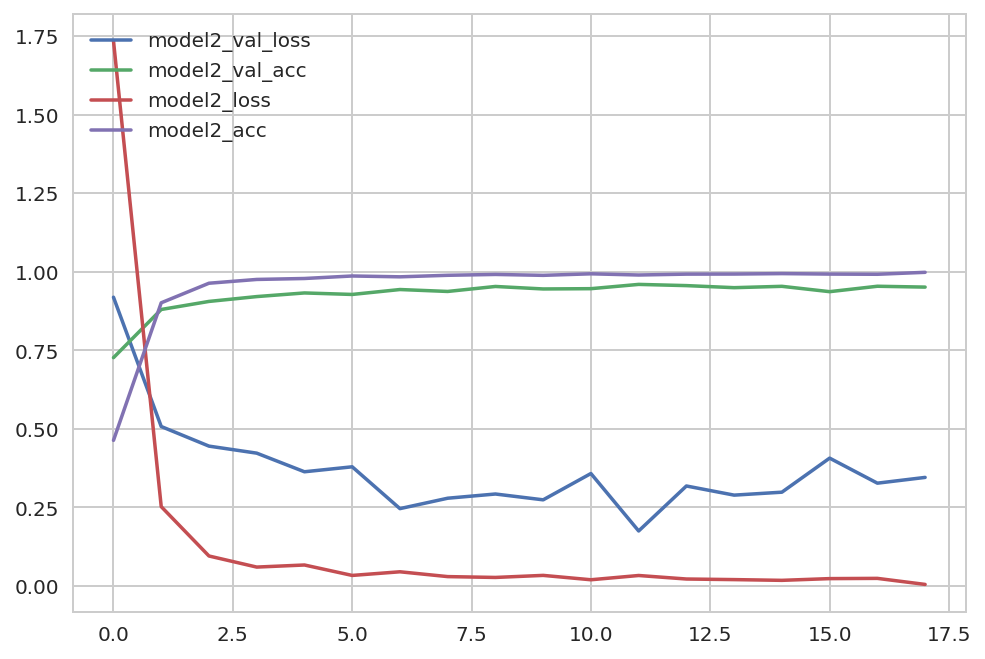

In [89]:
model2weighted_val_loss = model2WeightedHistory.history.get('val_loss')
model2weighted_val_acc = model2WeightedHistory.history.get('val_acc')
model2weighted_loss = model2WeightedHistory.history.get('loss')
model2weighted_acc = model2WeightedHistory.history.get('acc')
plt.plot(model2weighted_val_loss)
plt.plot(model2weighted_val_acc)
plt.plot(model2weighted_loss)
plt.plot(model2weighted_acc)
plt.legend(['model2_val_loss', 'model2_val_acc', 'model2_loss', 'model2_acc'], loc='upper left')
plt.show()

In [88]:
model2_weighted.save('models/model2weighted.h5')

From the above graph, it seems like the validation accuracy is going up a bit again while the train accuracy has pretty much gone to zero-- possibly overfitting? try again with a dropout layer

In [11]:
def vggLike(ksize=(2,2), dropout=0.25): #taking my inspiration from vgg, a deeper network
    input_shape = image_shape
    model = Sequential()
    model.add(Conv2D(32, kernel_size=ksize, activation='relu', padding='same', name='set1_conv1',input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=ksize, activation='relu', padding='same', name='set1_conv2'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), name='set1_pool'))
    
    model.add(Conv2D(64, kernel_size=ksize, activation='relu', padding='same', name='set2_conv1'))
    model.add(Conv2D(64, kernel_size=ksize, activation='relu', padding='same', name='set2_conv2'))
    model.add(Conv2D(64, kernel_size=ksize, activation='relu', padding='same', name='set2_conv3'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='set2_pool'))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', name='fc1'))
    model.add(Dropout(dropout))
    model.add(Dense(84, activation='relu' , name='fc2'))
    model.add(Dense(n_classes, activation='softmax', name='final'))
    model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
    return model

In [92]:
# adding in dropout, plus weaking kerne size==> thiws takes the accuracy and the validation accuracy to ~ 97% 
stopping_callback2 = EarlyStopping(monitor='val_loss', min_delta= 0.00001, patience=5)
K.clear_session()
batch_size = 32
epochs = 80
vgglike = vggLike(ksize=(3,3))
vgglikeHistory = vgglike.fit(X_train_norm2, y_train_cat, batch_size=batch_size,
              epochs=epochs, verbose=0,shuffle=True, validation_data=(X_valid_norm2, y_valid_cat), 
                class_weight=class_weight_dict, callbacks=[logging_callback, stopping_callback2])

0 2.53062520356 0.262421333957 0.741043084116
10 0.0536368167726 0.98140751171 0.975510204082
20 0.0497199845252 0.986062817897 0.973242630602


In [94]:
vgglike.save('models/vggLike.h5')

In [96]:
vggLikescore = vgglike.evaluate(X_valid_norm2, y_valid_cat, verbose=0)
print('loss: ', vggLikescore[0], ' acc: ', vggLikescore[1])

loss:  0.211733393888  acc:  0.965079365458


In [100]:
#despite having a different distribution, the test accuracy is similar to validation accuracy, at 96%
vggLikescoreTest = vgglike.evaluate(X_test_norm2, y_test_cat, verbose=0)
print('loss: ', vggLikescoreTest[0], ' acc: ', vggLikescoreTest[1])

loss:  0.24570643928  acc:  0.957244655629


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
stopping_callback2 = EarlyStopping(monitor='val_loss', min_delta= 0.00001, patience=5)
# only logs every 10 epcoh
def logger(epoch, logs):
    if epoch %10== 0: 
        print(epoch, logs['loss'], logs['acc'], logs['val_acc'])
logging_callback = LambdaCallback(
    on_epoch_end=logger)


In [13]:
K.clear_session()
batch_size = 32
epochs = 80
vgglike2 = vggLike(ksize=(3,3))
vgglike2History = vgglike2.fit(X_train_norm2, y_train_cat, batch_size=batch_size,
              epochs=epochs, verbose=0,shuffle=True, validation_data=(X_valid_norm2, y_valid_cat), 
                class_weight=class_weight_dict, callbacks=[logging_callback, stopping_callback2])

0 1.85485209021 0.431966435846 0.811791383544
10 0.0577763802025 0.983131699187 0.975510204082


In [14]:
#despite having a different distribution, the test accuracy is similar to validation accuracy, at 96%
vggLike2scoreTest = vgglike2.evaluate(X_test_norm2, y_test_cat, verbose=0)
print('loss: ', vggLike2scoreTest[0], ' acc: ', vggLike2scoreTest[1])

loss:  0.216378140056  acc:  0.962866191683


In [15]:
vgglike2.save('models/vggLike2.h5')

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


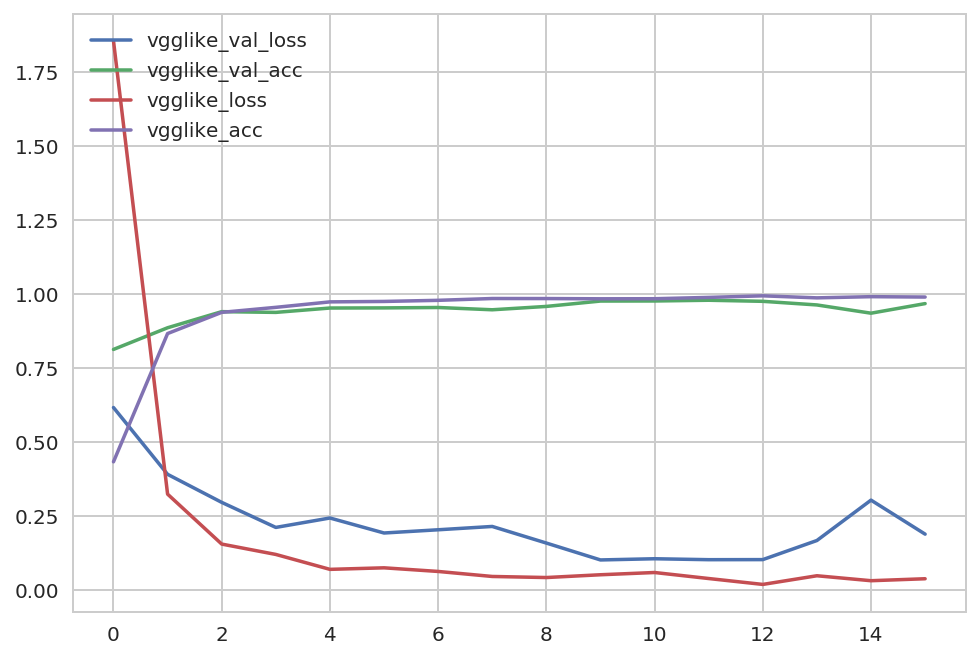

In [32]:
vgglike2weighted_val_loss = vgglike2History.history.get('val_loss')
vgglike2weighted_val_acc = vgglike2History.history.get('val_acc')
vgglike2weighted_loss = vgglike2History.history.get('loss')
vgglike2weighted_acc = vgglike2History.history.get('acc')
plt.plot(vgglike2weighted_val_loss)
plt.plot(vgglike2weighted_val_acc)
plt.plot(vgglike2weighted_loss)
plt.plot(vgglike2weighted_acc)
plt.legend(['vgglike_val_loss', 'vgglike_val_acc', 'vgglike_loss', 'vgglike_acc'], loc='upper left')
plt.show()
plt.savefig('examples/vgg_loss_monitoring.jpg')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needebn
from scipy.misc import imread, imresize
import tensorflow as tf
img1 = imread('data/traffic_sign1.jpg')
img2 = imread('data/traffic_sign14.jpg')
img3 = imread('data/traffic_sign0.jpg')
img4 = imread('data/traffic_sign17.jpg')
img5 = imread('data/traffic_sign35.jpg')
img6 = imread('data/traffic_sign2.jpg')

 

In [12]:
imglist = [img1, img2, img3, img4, img5, img6]
test_imgs = []
for i, img in enumerate(imglist):
    test_imgs.append(imresize(img,( 32,32)))

In [13]:
test_imgs_arr = np.array(test_imgs)
test_imgs_classes = np.array([1,14,0, 17,35, 2])


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


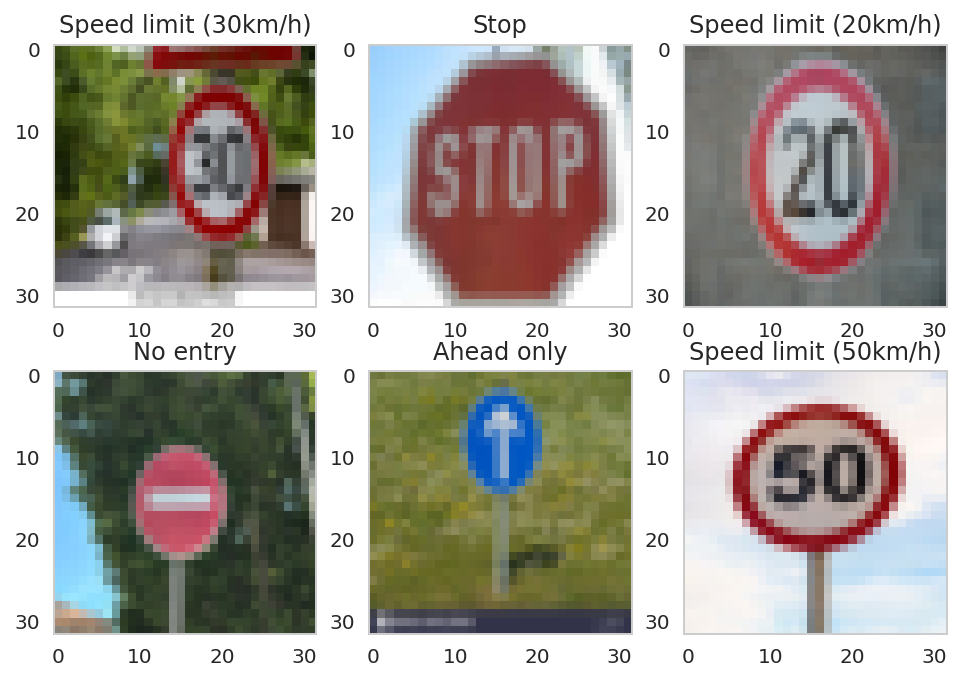

In [17]:
ax = plt.subplot(2,3,1)
ax.set_title(signnamesDF[signnamesDF['ClassId'] ==1]['SignName'][1])
ax.grid(False)
ax.imshow(test_imgs[0])
ax2 = plt.subplot(2,3,2)
ax2.grid(False)
ax2.set_title(signnamesDF[signnamesDF['ClassId'] == 14]['SignName'][14])
ax2.imshow(test_imgs[1])
ax3 = plt.subplot(2,3,3)
ax3.grid(False)
ax3.set_title(signnamesDF[signnamesDF['ClassId'] == 0]['SignName'][0])
ax3.imshow(test_imgs[2])

ax4 = plt.subplot(2,3,4)
ax4.set_title(signnamesDF[signnamesDF['ClassId'] == 17]['SignName'][17])
ax4.grid(False)
ax4.imshow(test_imgs[3])
ax5 = plt.subplot(2,3,5)
ax5.grid(False)
ax5.set_title(signnamesDF[signnamesDF['ClassId'] == 35]['SignName'][35])
ax5.imshow(test_imgs[4])
ax6 = plt.subplot(2,3,6)
ax6.grid(False)
ax6.set_title(signnamesDF[signnamesDF['ClassId'] == 2]['SignName'][2])
ax6.imshow(test_imgs[5])

plt.savefig('examples/test_images.jpg')

In [51]:
vggLikePredict = vgglike.predict(normalize(test_imgs_arr))

In [54]:
classesPred = []
for i in range(len(vggLikePredict)):
    print(i, np.argmax(vggLikePredict[i]))
    classesPred.append(np.argmax(vggLikePredict[i]))
print(classesPred)

# actual classes are ([1,14,0, 17,35])

0 25
1 14
2 0
3 15
4 36
[25, 14, 0, 15, 36]


### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accuracy = 0.4 
# hmm, not very good... 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [61]:
top_probas = []
for i in range(len(vggLikePredict)):
    sorted_arr = np.sort(vggLikePredict[i])[::-1]
    sorted_indexes = np.argsort(vggLikePredict[i])[::-1]
    top_probas.append((sorted_indexes[::-1][:5], sorted_arr[:5]))

In [62]:
top_probas

[(array([17, 32,  0, 39, 14]),
  array([ 0.98943138,  0.00315887,  0.00190572,  0.00126036,  0.0010737 ], dtype=float32)),
 (array([ 6, 24, 19, 32, 39]),
  array([  9.99993443e-01,   5.67735424e-06,   2.01609353e-07,
           1.83130979e-07,   1.28657788e-07], dtype=float32)),
 (array([36, 30, 20, 27, 21]),
  array([  1.00000000e+00,   1.86118780e-13,   9.58082965e-14,
           5.22367971e-15,   2.77476199e-15], dtype=float32)),
 (array([37, 21, 31, 24,  7]),
  array([ 0.85467714,  0.0535549 ,  0.03745114,  0.02497163,  0.01915162], dtype=float32)),
 (array([ 7,  0, 16,  6, 31]),
  array([ 0.98891592,  0.00451771,  0.00348161,  0.00162086,  0.0014565 ], dtype=float32))]

In [56]:
np.argsort(vggLikePredict[0])[::-1]

array([25, 11, 24, 30, 40, 12,  2,  1, 23,  7, 31,  5, 38,  9, 13, 34, 15,
       18, 35,  3, 42, 26, 21, 37, 33,  4, 28, 27,  8, 22, 29, 36, 20, 16,
       10, 19, 41,  6, 14, 39,  0, 32, 17])

In [50]:
np.argmax(vggLikePredict[0])

0

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")